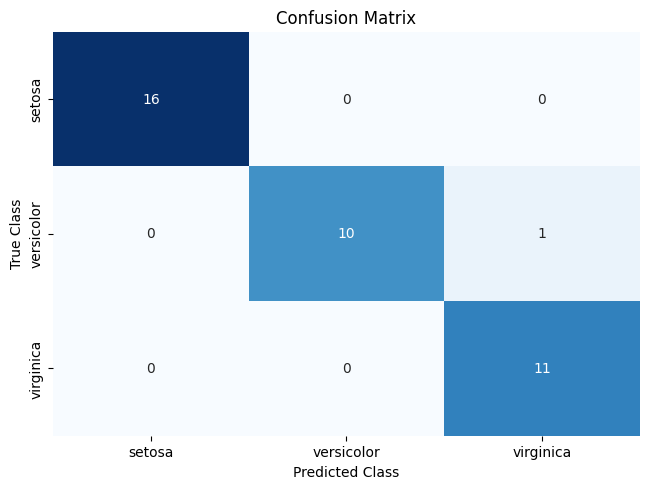

In [2]:
#11.7 Visualizing a Classifier’s Performance

# Load libraries
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import pandas as pd

# Load data
iris = datasets.load_iris()

# Create features matrix
features = iris.data

# Create target vector
target = iris.target

# Create list of target class names
class_names = iris.target_names

# Create training and test set
features_train, features_test, target_train, target_test = train_test_split(
    features, target, random_state=2
)

# Create logistic regression
classifier = LogisticRegression()

# Train model and make predictions
target_predicted = classifier.fit(features_train,
                                  target_train).predict(features_test)

# Create confusion matrix
matrix = confusion_matrix(target_test, target_predicted)

# Create pandas dataframe
df = pd.DataFrame(matrix, index=class_names, columns=class_names)

# Create heatmap
sns.heatmap(df, annot=True, cbar=None, cmap="Blues")
plt.title("Confusion Matrix"), plt.tight_layout()
plt.ylabel("True Class"), plt.xlabel("Predicted Class")
plt.show()



In [3]:
#11.8 Evaluating Regression Models

# Load libraries
from sklearn.datasets import make_regression
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

# Generate features matrix, target vector
features, target = make_regression(n_samples=100,
                                   n_features=3,
                                   n_informative=3,
                                   n_targets=1,
                                   noise=50,
                                   coef=False,
                                   random_state=1)

# Create a linear regression object
ols = LinearRegression()

# Cross-validate the linear regression using (negative) MSE
cross_val_score(ols, features, target, scoring='neg_mean_squared_error')

array([-1974.65337976, -2004.54137625, -3935.19355723, -1060.04361386,
       -1598.74104702])

In [ ]:
# Cross-validate the linear regression using R-squared
cross_val_score(ols, features, target, scoring='r2')

In [6]:
#11.9 Evaluating Clustering Models

# Load libraries
import numpy as np
from sklearn.metrics import silhouette_score
from sklearn import datasets
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

# Generate features matrix
features, _ = make_blobs(n_samples=1000,
                         n_features=10,
                         centers=2,
                         cluster_std=0.5,
                         shuffle=True,
                         random_state=1)

# Cluster data using k-means to predict classes
model = KMeans(n_clusters=2, random_state=1).fit(features)

# Get predicted classes
target_predicted = model.labels_

# Evaluate model
silhouette_score(features, target_predicted)

0.8916265564072141

In [7]:
#11.10 Creating a Custom Evaluation Metric

# Load libraries

from sklearn.metrics import make_scorer, r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.datasets import make_regression

# Generate features matrix and target vector
features, target = make_regression(n_samples=100,
                                   n_features=3,
                                   random_state=1)

# Create training set and test set
features_train, features_test, target_train, target_test = train_test_split(
    features, target, test_size=0.10, random_state=1
)

# Create custom metric
def custom_metric(target_test, target_predicted):
    # Calculate R-squared score
    r2 = r2_score(target_test, target_predicted)
    # Return R-squared score
    return r2

# Make scorer and define that higher scores are better
score = make_scorer(custom_metric, greater_is_better=True)

# Create ridge regression object
classifier = Ridge()

# Train ridge regression model
model = classifier.fit(features_train, target_train)

# Apply custom scorer
score(model, features_test, target_test)


0.9997906102882058

In [9]:
# Predict values
target_predicted = model.predict(features_test)

# Calculate R-squared score
r2_score(target_test, target_predicted)

0.9997906102882058

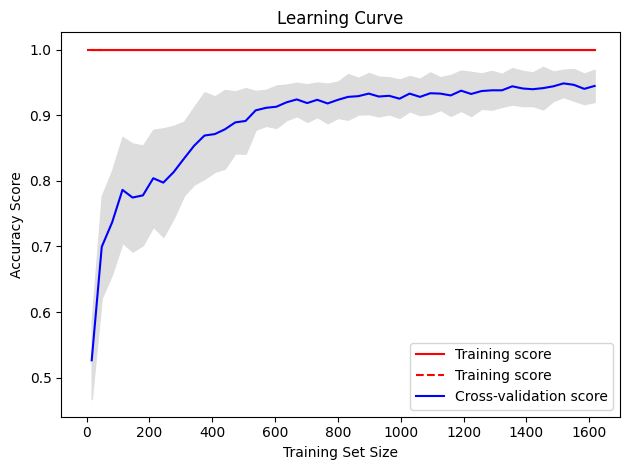

In [14]:
#11.11 Visualizing the Effect of Training Set Size

# Load libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_digits
from sklearn.model_selection import learning_curve

# Load data
digits = load_digits()

# Create feature matrix and target vector
features, target = digits.data, digits.target

# Create CV training and test scores for various training set sizes

train_sizes, train_scores, test_scores = learning_curve(
    RandomForestClassifier(), # Classifier
    features,
    target,
    cv = 10, # Number of folds
    scoring='accuracy',
    n_jobs=-1, # Use all computer cores
    train_sizes=np.linspace(
        0.01,
        1.0,
        50 # Sizes of 50
    )
)

# Create means and standard deviations of training set scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

# Create means and standard deviations of test set scores
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Draw lines
plt.plot(train_sizes, train_mean, train_mean, '--', color="red", label="Training score")
plt.plot(train_sizes, test_mean, color="blue", label="Cross-validation score")

# Draw bands
plt.fill_between(train_sizes, train_mean - train_std,
                 train_mean + train_std, color = "#DDDDDD")
plt.fill_between(train_sizes, test_mean - test_std,
test_mean + test_std, color="#DDDDDD")

# Create plot
plt.title("Learning Curve")
plt.xlabel("Training Set Size"), plt.ylabel("Accuracy Score"),
plt.legend(loc="best")
plt.tight_layout()
plt.show()

In [17]:
#11.12 Creating a Text Report of Evaluation Metrics

# Load libraries
from sklearn import datasets
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Load data
iris = datasets.load_iris()

# Create features matrix
features = iris.data

# Create target vector
target = iris.target

# Create list of target class names
class_names = iris.target_names

# Create training and test set
features_train, features_test, target_train, target_test =train_test_split(
    features, target, random_state=0
)

# Create logistic regression
classifier = LogisticRegression()

# Train model and make predictions
model = classifier.fit(features_train, target_train)
target_predicted = model.predict(features_test)

# Create a classification report
print(classification_report(target_test,
                            target_predicted,
                            target_names=class_names))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        13
  versicolor       1.00      0.94      0.97        16
   virginica       0.90      1.00      0.95         9

    accuracy                           0.97        38
   macro avg       0.97      0.98      0.97        38
weighted avg       0.98      0.97      0.97        38



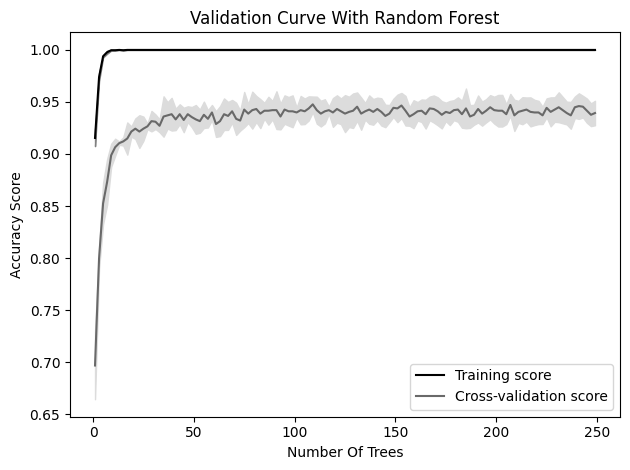

In [20]:
#11.13 Visualizing the Effect of Hyperparameter Values

# Load libraries
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_digits
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import validation_curve

# Load data
digits = load_digits()

# Create feature matrix and target vector
features, target = digits.data, digits.target

# Create range of values for parameter
param_range = np.arange(1,250,2) # در گام دوم

# Calculate accuracy on training and test set using range of parameter values
train_scores, test_scores = validation_curve(
    RandomForestClassifier(),
    features,
    target,
    param_name="n_estimators",
    param_range=param_range,
    cv = 3,
    scoring='accuracy',
    n_jobs=-1
)

# Calculate mean and standard deviation for training set scores
train_mean = np.mean(train_scores, axis=1) # axis = 1 -> on rows
train_std = np.std(train_scores, axis=1)

# Calculate mean and standard deviation for test set scores
test_mean = np.mean(test_scores, axis=1) # axis = 1 -> on rows
test_std = np.std(test_scores, axis=1)

# Plot mean accuracy scores for training and test sets
plt.plot(param_range, train_mean, label = "Training score", color = "black")
plt.plot(param_range, test_mean, label = "Cross-validation score", color = "dimgrey")

# Plot accuracy bands for training and test sets
plt.fill_between(param_range, train_mean - train_std,
                 train_mean + train_std, color = "gray")
plt.fill_between(param_range, test_mean - test_std,
                 test_mean + test_std, color = "gainsboro")

# Create plot
plt.title("Validation Curve With Random Forest")
plt.xlabel("Number Of Trees")
plt.ylabel("Accuracy Score")
plt.tight_layout()
plt.legend(loc = "best")
plt.show()